<a href="https://colab.research.google.com/github/Bonifacethuo/GitPractice/blob/main/Jagedo_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

In [6]:
#uploading the dataset
df_1=pd.read_excel('/content/Client_Details_1000.xlsx')
df_2=pd.read_excel('/content/Professional_Dataset_300.xlsx')


In [ ]:
#overview of the client's dataset
df_1.head()

,Client ID,Name,Profession,Gender,County
0,1,Client_1,Construction Manager,Female,Marsabit
1,2,Client_2,Land Surveyor,Female,Kakamega
2,3,Client_3,Project Manager,Male,Kisii
3,4,Client_4,Project Manager,Prefer not to say,Bungoma
4,5,Client_5,Geotechnical Engineer,Prefer not to say,Vihiga


In [ ]:
#overview of the professional's dataset
df_2.head()

,Name,Profession,Gender,County,Rating,Response Time,Customer Satisfaction
0,Professional_001,Roads Engineer,Prefer not to say,Busia,2,4–5 hours,Good
1,Professional_002,Geotechnical Engineer,Female,Nyamira,2,Below 1 hour,Fair
2,Professional_003,Hydrologist,Prefer not to say,Kilifi,3,2–3 hours,Excellent
3,Professional_004,Safety Officer,Male,Marsabit,4,4–5 hours,Excellent
4,Professional_005,Safety Officer,Male,Kericho,3,Below 1 hour,Bad


#Data Cleaning

In [11]:
#checking on the missing values
df_1.isnull().sum()

,0
Name,0
Profession,0
Gender,0
County,0


In [12]:
#check on the duplicates
df_1.duplicated().sum()

np.int64(0)

In [13]:
#check on the mising values df__2
df_2.isnull().sum()

,0
Name,0
Profession,0
Gender,0
County,0
Rating,0
Response Time,0
Customer Satisfaction,0


In [14]:
#missing values inf df_2
df_2.duplicated().sum()

np.int64(0)

In [9]:
#Remove the first collumn on df_1; client ID
df_1.drop('Client ID', axis=1, inplace=True)

In [10]:
df_1.head()

,Name,Profession,Gender,County
0,Client_1,Construction Manager,Female,Marsabit
1,Client_2,Land Surveyor,Female,Kakamega
2,Client_3,Project Manager,Male,Kisii
3,Client_4,Project Manager,Prefer not to say,Bungoma
4,Client_5,Geotechnical Engineer,Prefer not to say,Vihiga


In [38]:
#definging the data
df_1[['Profession', 'County', 'Gender']] = df_1[['Profession', 'County', 'Gender']].fillna('Unknown')
df_professionals[['Profession', 'County', 'Gender']] = df_professionals[['Profession', 'County', 'Gender']].fillna('Unknown')


In [39]:
df_professionals[['Customer Satisfaction Encoded', 'Response Time Encoded']] = \
    df_professionals[['Customer Satisfaction Encoded', 'Response Time Encoded']].fillna(0)


#Categorical and Numerical Features


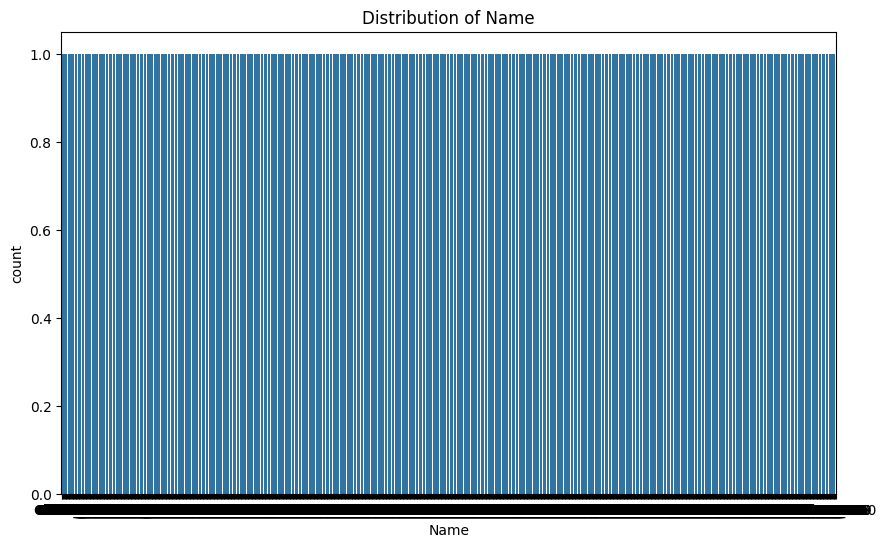

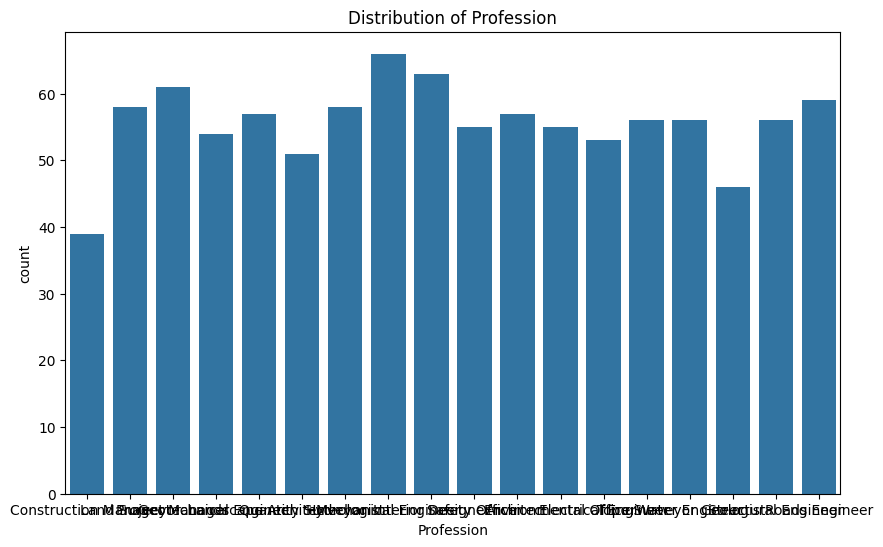

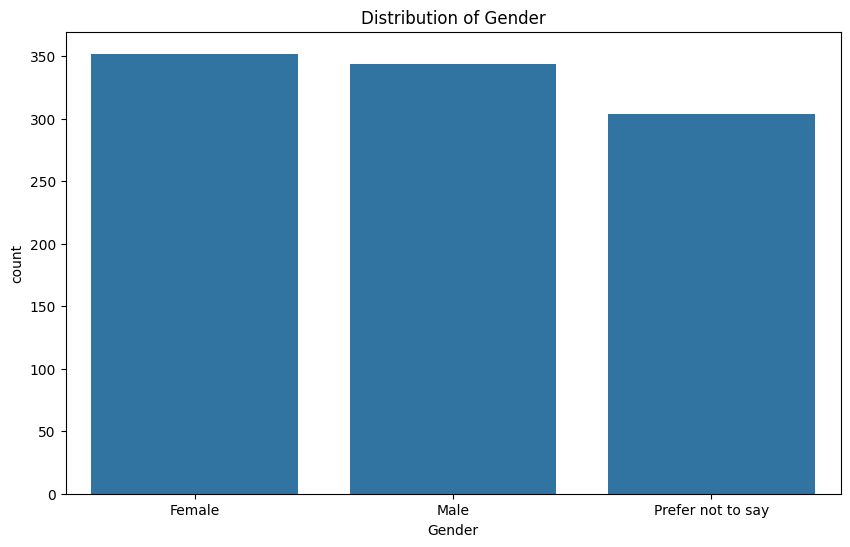

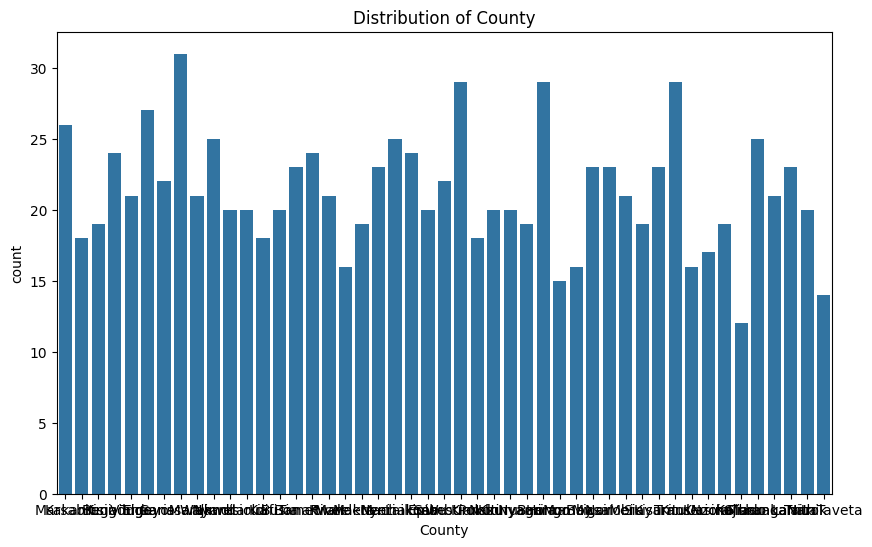

In [16]:
# Distribution analysis for categorical features
categorical_features = df_1.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_1, x=feature)
    plt.title(f'Distribution of {feature}')

#One Hot encoding

In [23]:
#One hot encoding for the categorical features
df_1_encoded = pd.get_dummies(df_1, columns=categorical_features)

In [24]:
#one Hot encoding the categorical features in df_2
df_2_encoded = pd.get_dummies(df_2, columns=categorical_features)

In [25]:
#Convert response time & satisfaction to number in df_2
response_time_map = {'Below 1 hour': 1, '2–3 hours': 2, '4–5 hours': 3}
satisfaction_map = {'Excellent': 3, 'Good': 2, 'Fair': 1, 'Bad': 0}



In [29]:
print(df_1.columns.tolist())


['Name', 'Profession', 'Gender', 'County']


In [32]:
# renaming the professional dataset
df_professionals = df_2

# Encode 'Response Time' and 'Customer Satisfaction'
response_time_map = {
    'Below 1 hour': 1,
    '2–3 hours': 2,
    '4–5 hours': 3,
    '6–10 hours': 4,
    'More than 10 hours': 5
}

satisfaction_map = {
    'Excellent': 3,
    'Good': 2,
    'Fair': 1,
    'Bad': 0
}

df_professionals['Response Time Encoded'] = df_professionals['Response Time'].map(response_time_map)
df_professionals['Customer Satisfaction Encoded'] = df_professionals['Customer Satisfaction'].map(satisfaction_map)


#Preprocessing the data

In [36]:
#OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_clients = encoder.fit_transform(df_1[['Profession', 'County', 'Gender']])
encoded_pros = encoder.transform(df_professionals[['Profession', 'County', 'Gender']])


In [41]:

# Combine both for fitting
combined = pd.concat([
    df_1[['Profession', 'County', 'Gender']],
    df_professionals[['Profession', 'County', 'Gender']]
], axis=0)

# OneHotEncode together to capture all possible categories
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(combined)

# Then transform separately
client_features = encoder.transform(df_1[['Profession', 'County', 'Gender']])
professional_features = encoder.transform(df_professionals[['Profession', 'County', 'Gender']])


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Make sure your features are encoded and have no NaNs
client_features = encoded_clients
professional_features = encoded_pros

# Step 2: Calculate similarity matrix
similarity_scores = cosine_similarity(client_features, professional_features)


In [44]:
#embracing the top 3 matches
top_n = 3

for i in range(len(df_1)):
    print(f"\nTop {top_n} matches for Client_{i} needing a {df_1.loc[i, 'Profession']} in {df_1.loc[i, 'County']}:")

    client_sim_scores = similarity_scores[i]
    top_indices = client_sim_scores.argsort()[-top_n:][::-1]

    for rank, idx in enumerate(top_indices):
        pro = df_professionals.iloc[idx]
        print(f"{rank+1}. {pro['Name']} — {pro['Profession']}, {pro['County']}, Satisfaction: {pro['Customer Satisfaction']}")



Top 3 matches for Client_0 needing a Construction Manager in Marsabit:
1. Professional_283 — Construction Manager, Machakos, Satisfaction: Fair
2. Professional_078 — Construction Manager, Mombasa, Satisfaction: Good
3. Professional_056 — Geotechnical Engineer, Marsabit, Satisfaction: Fair

Top 3 matches for Client_1 needing a Land Surveyor in Kakamega:
1. Professional_006 — Geologist, Kakamega, Satisfaction: Good
2. Professional_255 — Land Surveyor, Nairobi, Satisfaction: Fair
3. Professional_225 — Land Surveyor, Kirinyaga, Satisfaction: Good

Top 3 matches for Client_2 needing a Project Manager in Kisii:
1. Professional_030 — Water Engineer, Kisii, Satisfaction: Bad
2. Professional_234 — Project Manager, Kakamega, Satisfaction: Excellent
3. Professional_256 — Project Manager, Makueni, Satisfaction: Good

Top 3 matches for Client_3 needing a Project Manager in Bungoma:
1. Professional_064 — Project Manager, Nyamira, Satisfaction: Bad
2. Professional_052 — Project Manager, Kericho, Sat

#Deployment


In [45]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

def load_and_prepare_data(client_path, professional_path):
    df_clients = pd.read_csv(client_path)
    df_pros = pd.read_csv(professional_path)

    df_clients.fillna("Unknown", inplace=True)
    df_pros.fillna("Unknown", inplace=True)

    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder.fit(pd.concat([df_clients[['Profession', 'County', 'Gender']],
                           df_pros[['Profession', 'County', 'Gender']]]))

    client_features = encoder.transform(df_clients[['Profession', 'County', 'Gender']])
    pro_features = encoder.transform(df_pros[['Profession', 'County', 'Gender']])

    return df_clients, df_pros, client_features, pro_features

def match_professionals(client_index, client_features, pro_features, df_pros, top_n=3):
    sim_scores = cosine_similarity(client_features, pro_features)
    scores = sim_scores[client_index]
    top_indices = scores.argsort()[-top_n:][::-1]

    return df_pros.iloc[top_indices].to_dict(orient='records')


In [ ]:
#model 2: Random Forest

In [47]:
#train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#training the Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


In [ ]:
#evaluating the model
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [ ]:
#Model used in Prediction
new_data = pd.DataFrame([{
    'Profession': 'Construction Manager',
    'County': 'Marsabit',
    'Gender': 'Male',
    'Response Time': '2–3 hours'
}])

# Encode new data
new_X = encoder.transform(new_data)

# Predict
predicted_label = rf_model.predict(new_X)
predicted_class = label_encoder.inverse_transform(predicted_label)

print(f"Predicted Customer Satisfaction: {predicted_class[0]}")
